# Exemplo 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

from seaborn import violinplot
from seaborn import boxplot
from seaborn import distplot

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Dimensão da base
df.shape

(768, 9)

In [ ]:
#Tipos de dados
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Total de registros
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
#Detalhes da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Medidas estatísticas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

# Donut

In [ ]:
donut_out = df["Outcome"].value_counts().reset_index()
donut_out

,index,Outcome
0,0,500
1,1,268


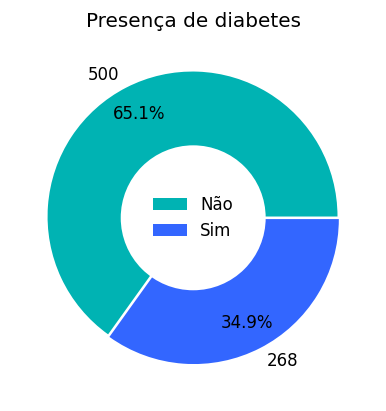

In [ ]:
labels = ["Não", "Sim"]
colors = ["#00b3b3", "#3366ff"]
explode = (0.01, 0.01)

fig, ax = plt.subplots(dpi = 120,figsize = (8,4))
plt.pie(donut_out["Outcome"], colors = colors, labels = donut_out["Outcome"],
        autopct = "%1.1f%%", pctdistance = 0.8,
        explode = explode)
  
# o Donut
centre_circle = plt.Circle((0.0, 0.0), 0.5, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presença de diabetes")
plt.legend(labels, loc = "center", frameon = False)
plt.show()

# Boxplot, swarmplot, countplot e Violin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


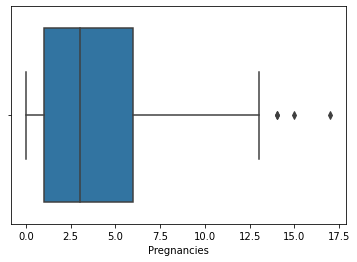

In [ ]:
boxplot(df.Pregnancies, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


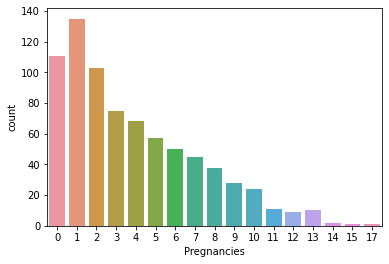

In [ ]:
sns.countplot(df['Pregnancies'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


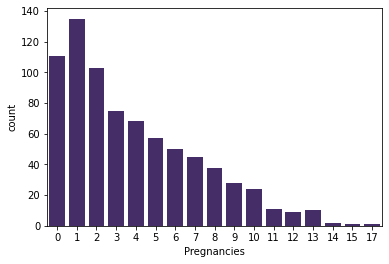

In [ ]:
sns.countplot(df['Pregnancies'], palette=['#432371'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


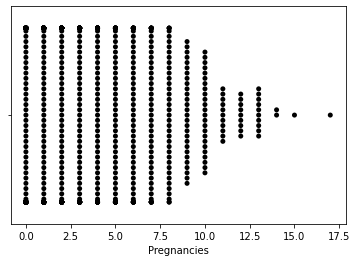

In [ ]:
sns.swarmplot(df['Pregnancies'], palette=["#000000"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


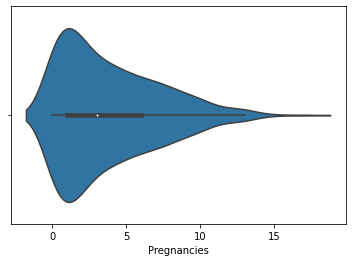

In [ ]:
violinplot(df.Pregnancies, data=df , orient="v")

Glucose 

In [ ]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


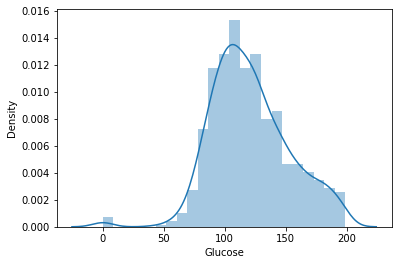

In [ ]:
sns.distplot(df.Glucose)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


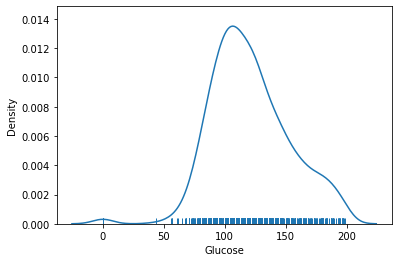

In [ ]:
sns.distplot(df.Glucose, rug=True, hist=False) 

In [ ]:
boxplot(df.Glucose, orient = "v")

In [ ]:
violinplot(df.Glucose, data=df , orient="v")

**Blood Pressure**

In [ ]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

**Pressão igual a ZERO??????**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


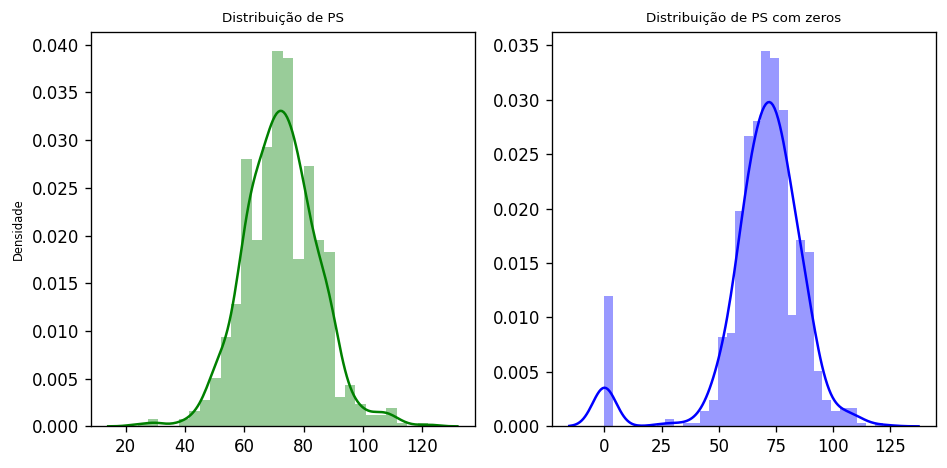

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribuição de PS', fontdict={'fontsize':8})
axes[0].set(xlabel=None)
axes[0].set_ylabel('Densidade', fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.distplot(df['BloodPressure'],ax=axes[1],color='blue')
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[1].set_title('Distribuição de PS com zeros',fontdict={'fontsize':8})
axes[1].set(xlabel=None, ylabel=None)
plt.tight_layout()

In [ ]:
violinplot(df.SkinThickness, data=df , orient="v")

# Distribuição de Freq - Exemplo : Pregnancies

In [ ]:
frec = df["Pregnancies"].value_counts()
frec = frec.sort_index(ascending=True)
frec

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
# Freq absoluta
frec_df = pd.DataFrame(frec)
frec_df.rename(columns = {'Pregnancies':'Frec_abs'}, inplace = True)
frec_df

,Frec_abs
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38
9,28


## Freq Acumulada

In [ ]:
Frec_abs_val = frec_df["Frec_abs"].values
acum = []
valor_acum = 0
for i in Frec_abs_val:
    print(i)
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum
frec_df

Não precisa disso tudo né?????

In [ ]:
frec_df["frec_abs_acum"] = frec_df["Frec_abs"].cumsum()
frec_df

,Frec_abs,frec_abs_acum
0,111,111
1,135,246
2,103,349
3,75,424
4,68,492
5,57,549
6,50,599
7,45,644
8,38,682
9,28,710


In [ ]:
#Freq Relativa %
frec_df["frec_rel"] = round(100 * frec_df["Frec_abs"]/len(df.Pregnancies),2)
frec_df

,Frec_abs,frec_abs_acum,frec_rel
0,111,111,14.45
1,135,246,17.58
2,103,349,13.41
3,75,424,9.77
4,68,492,8.85
5,57,549,7.42
6,50,599,6.51
7,45,644,5.86
8,38,682,4.95
9,28,710,3.65


## Freq relativa acumulada

In [ ]:
frec_df["frec_rel_acum"] = round(100*frec_df["frec_abs_acum"]/sum(frec_df.Frec_abs),2)
frec_df

,Frec_abs,frec_abs_acum,frec_rel,frec_rel_acum
0,111,111,14.45,14.45
1,135,246,17.58,32.03
2,103,349,13.41,45.44
3,75,424,9.77,55.21
4,68,492,8.85,64.06
5,57,549,7.42,71.48
6,50,599,6.51,77.99
7,45,644,5.86,83.85
8,38,682,4.95,88.80
9,28,710,3.65,92.45


# Pareto

https://matplotlib.org/stable/api/markers_api.html

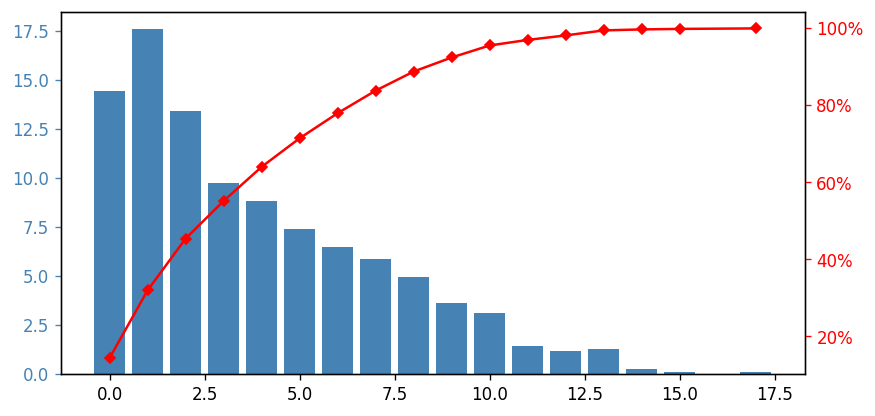

In [ ]:
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#Gráfico básico
fig, ax = plt.subplots(dpi=120,figsize = (8,4))
ax.bar(frec_df.index, frec_df['frec_rel'], color = color1)

#Curva cumulativa
ax2 = ax.twinx()
ax2.plot(frec_df.index, frec_df['frec_rel_acum'], color = color2, 
                marker = "D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
plt.show()

# Gauge

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0 , 1]},
    value = df["Glucose"].mean(),
    mode = "gauge+number+delta",
    title = {'text': "Glucose"},
    delta = {'reference': 150},
    gauge = {'axis': {'range': [0, 200]},
             'steps' : [
                 {'range': [0, 100],   'color': "lightgray"},
                 {'range': [100, 150], 'color': "darkgray"},
                 {'range': [150, 200], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 200}}))

fig.show()

Pokemon

In [42]:
dados = pd.read_csv("/content/pokemon.csv")
dados.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')